In [1]:
import h2o
from h2o.automl import H2OAutoML

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,21 mins 33 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.37.0.99999
H2O_cluster_version_age:,25 minutes
H2O_cluster_name:,tomasfryda
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.309 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv")

response = "quality"

predictors = [
  "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
  "total sulfur dioxide", "density", "pH", "sulphates", "alcohol",  "type"
]


train, test = df.split_frame(seed=1)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(x=predictors, y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_3_AutoML_3_20220408_140442

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.023283411162563286
RMSE: 0.15258902700575586
MAE: 0.11065966448963627
RMSLE: 0.023320327709643703
R^2: 0.9696935442322193
Mean Residual Deviance: 0.023283411162563286
Null degrees of freedom: 4864
Residual degrees of freedom: 4856
Null deviance: 3737.612744090442
Residual deviance: 113.2737953058704
AIC: -4466.196859377104

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3759629223874193
RMSE: 0.6131581544654032
MAE: 0.42868816136684146
RMSLE: 0.0929837223844714
R^2: 0.5106342623893481
Mean Residual Deviance: 0.3759629223874193
Null degrees of freedom: 4864
Residual degrees of freedom: 4855
Null deviance: 3739.8

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,0.429053,0.013194,0.418140,0.414085,0.432899,0.433157,0.446985
1,mean_residual_deviance,0.376736,0.026199,0.351823,0.353463,0.392439,0.372864,0.413090
2,mse,0.376736,0.026199,0.351823,0.353463,0.392439,0.372864,0.413090
3,null_deviance,747.967400,44.680550,758.488650,712.955260,794.441160,783.059700,690.892200
4,r2,0.508815,0.032326,0.530349,0.505313,0.523121,0.531222,0.454068
5,residual_deviance,365.811920,12.459985,356.044860,350.635000,378.703370,366.525540,377.150850
6,rmse,0.613494,0.021237,0.593147,0.594527,0.626449,0.610626,0.642721
7,rmsle,0.093029,0.004232,0.088082,0.090218,0.096522,0.092163,0.098159


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_3_20220408_140442,0.613158,0.375963,0.428688,0.0929837,0.375963,1334,0.072912,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_3_20220408_140442,0.615253,0.378536,0.431953,0.093312,0.378536,423,0.027955,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_3_20220408_140442,0.61886,0.382988,0.439722,0.0937725,0.382988,146,0.033774,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_3_20220408_140442,0.619165,0.383365,0.440646,0.0937997,0.383365,146,0.02613,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_3_20220408_140442,0.619706,0.384036,0.441241,0.0938909,0.384036,148,0.025569,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_3_20220408_140442,0.620427,0.38493,0.442876,0.0939805,0.38493,138,0.023944,StackedEnsemble
DRF_1_AutoML_3_20220408_140442,0.622971,0.388092,0.449611,0.094527,0.388092,607,0.012088,DRF
GBM_grid_1_AutoML_3_20220408_140442_model_8,0.624575,0.390094,0.422475,0.0949575,0.390094,1812,0.013222,GBM
XRT_1_AutoML_3_20220408_140442,0.626012,0.391891,0.452358,0.0950673,0.391891,836,0.012583,DRF
GBM_grid_1_AutoML_3_20220408_140442_model_5,0.641773,0.411872,0.469973,0.0970923,0.411872,941,0.015306,GBM


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

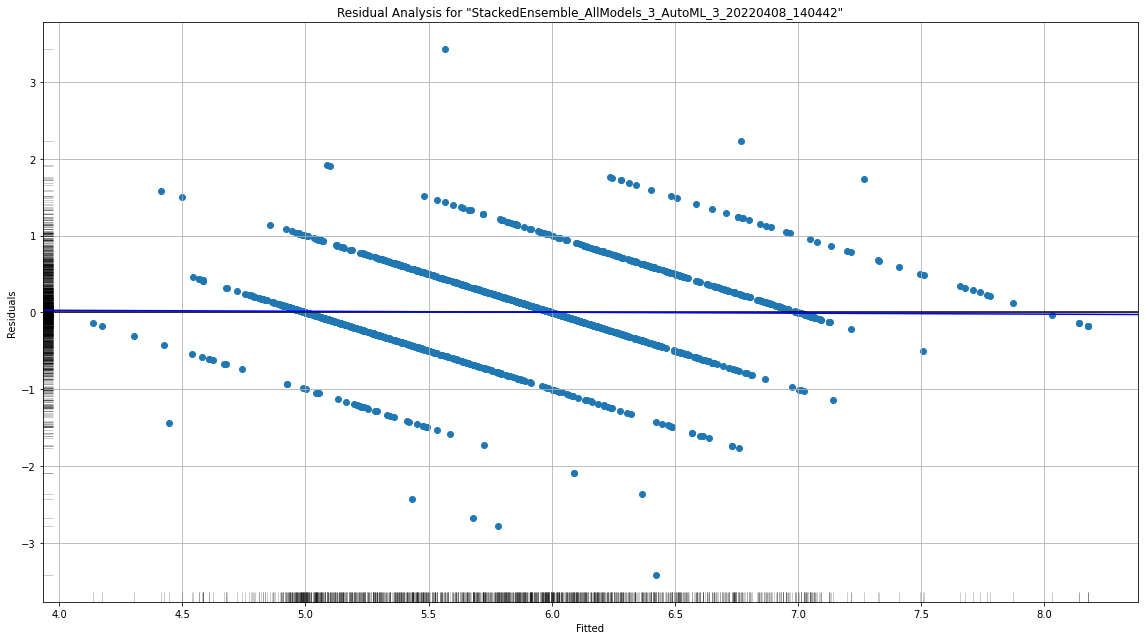

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

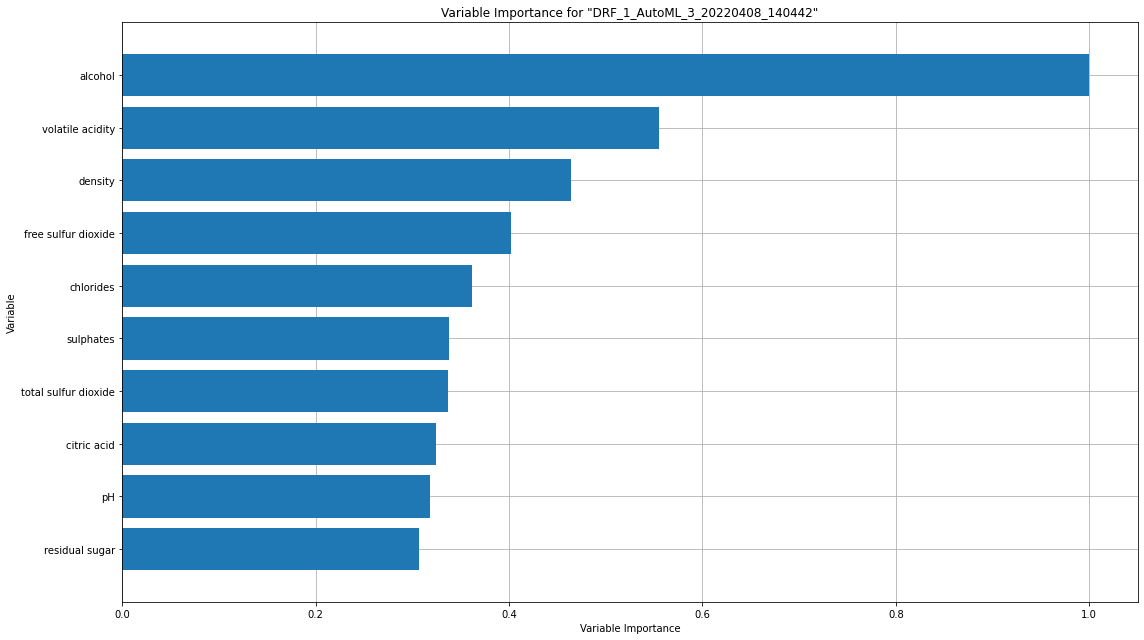

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

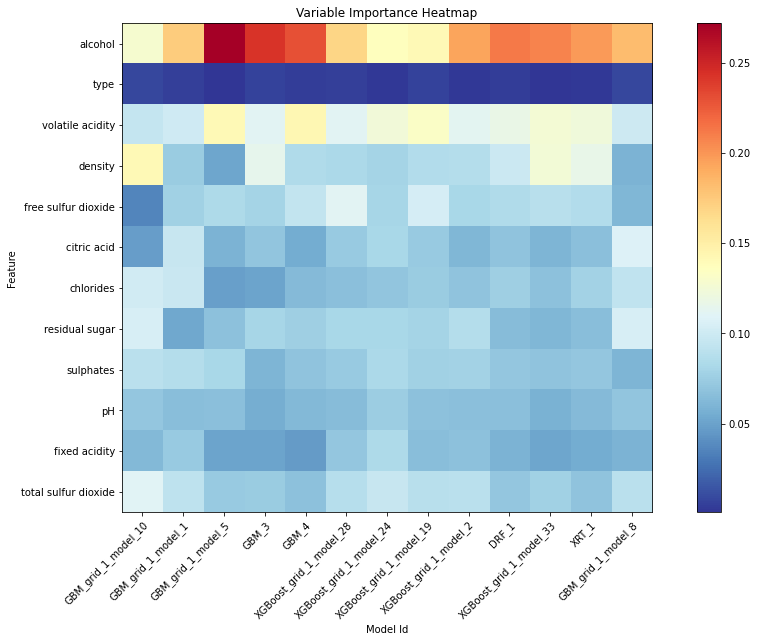

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

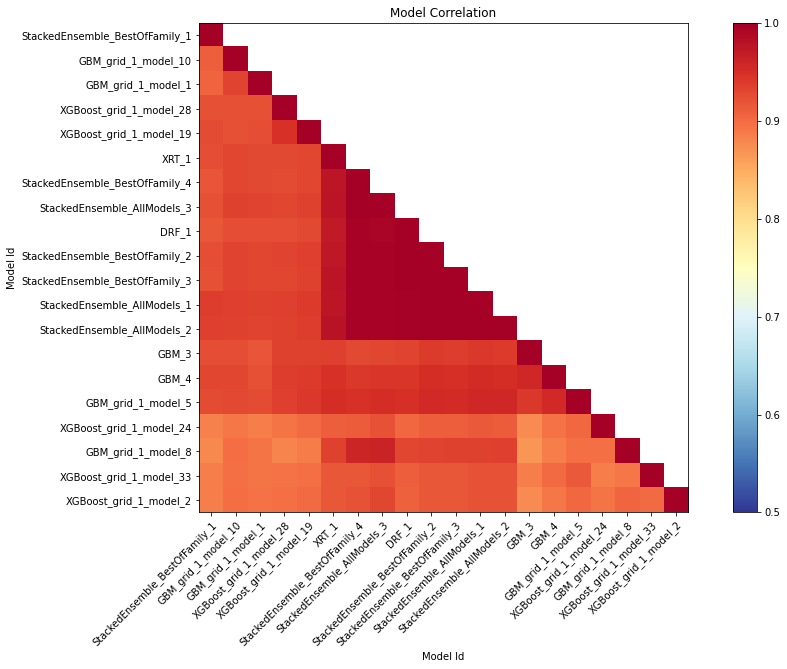

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

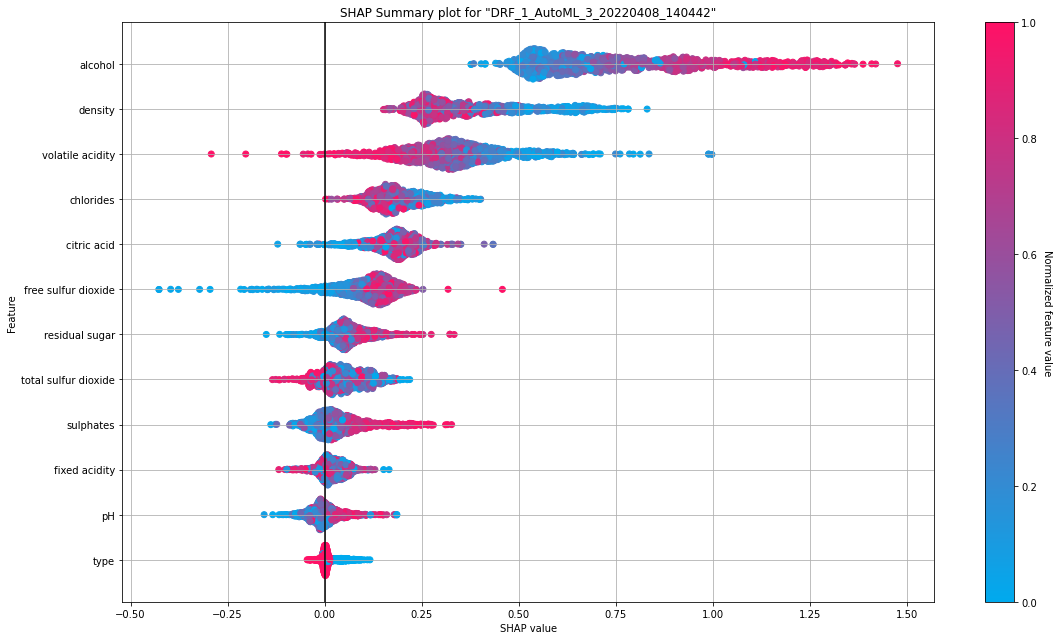

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

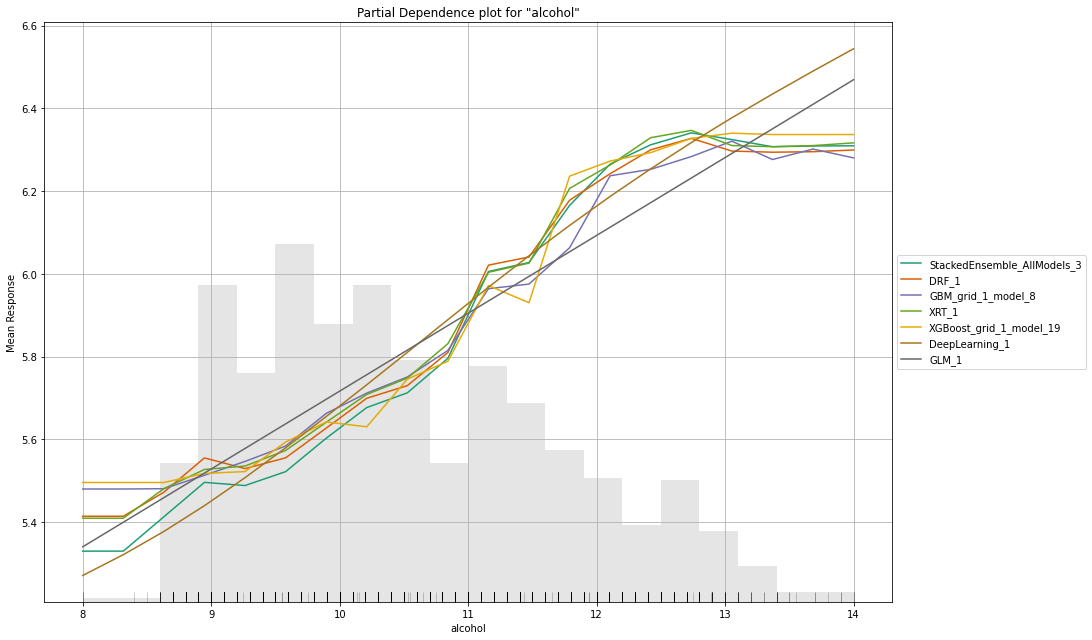

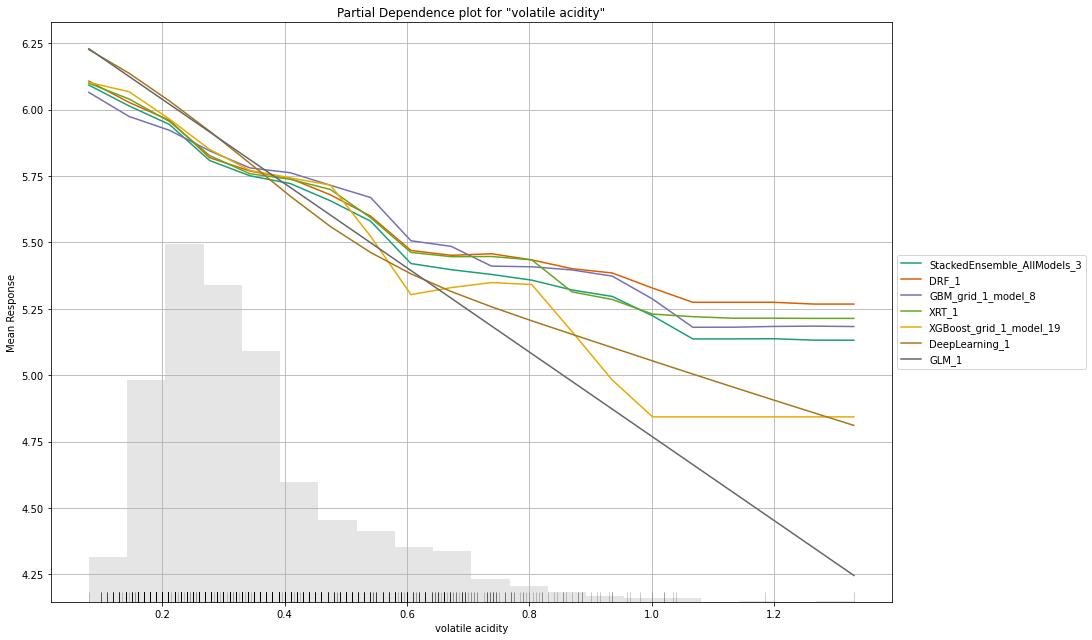

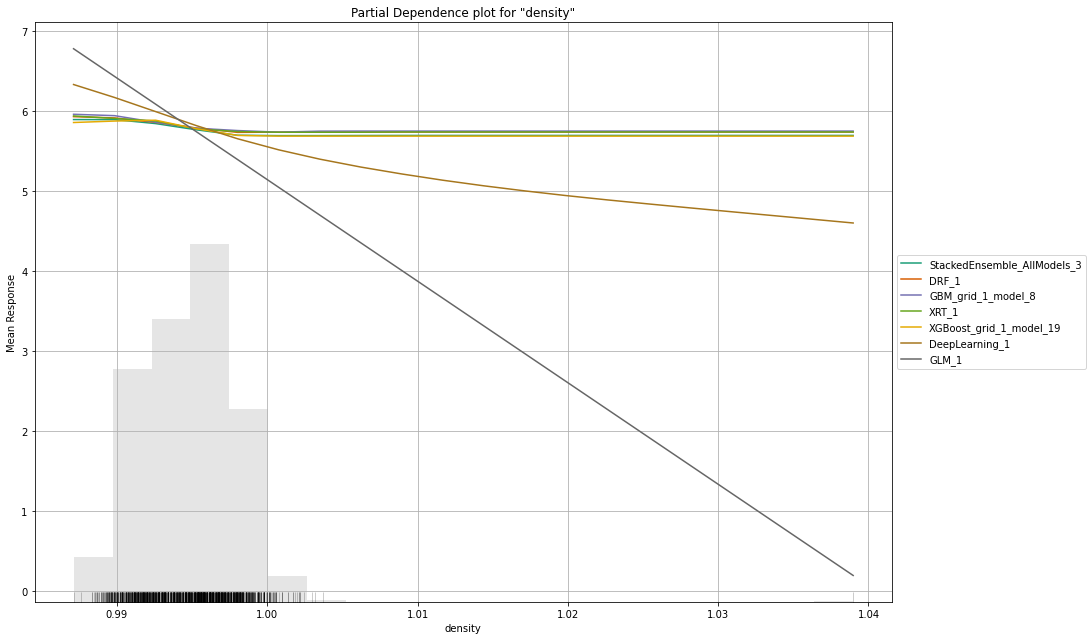

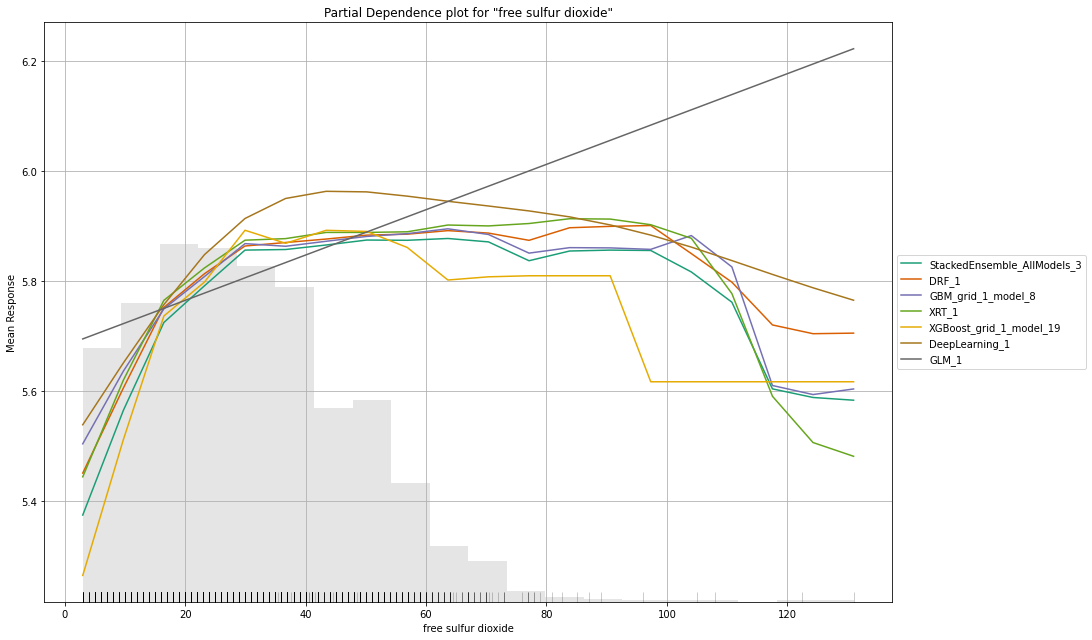

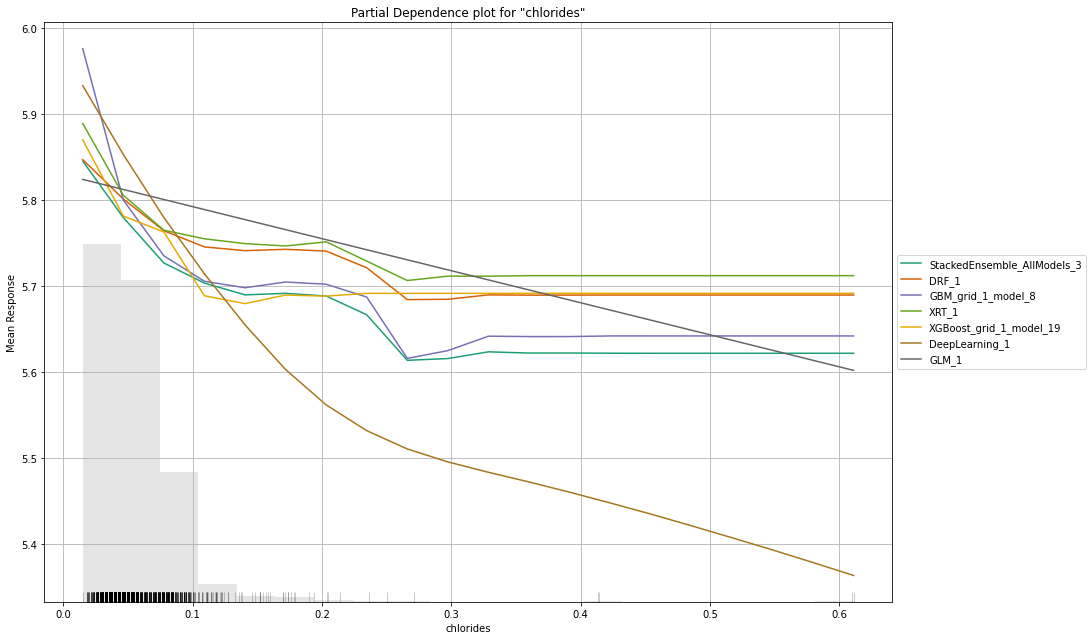

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

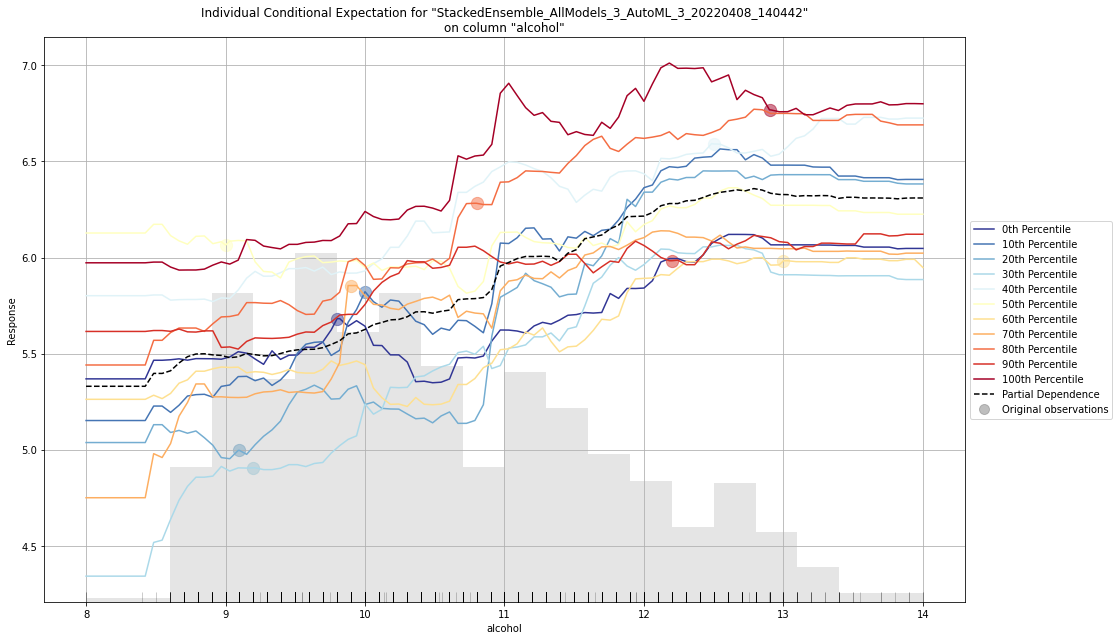

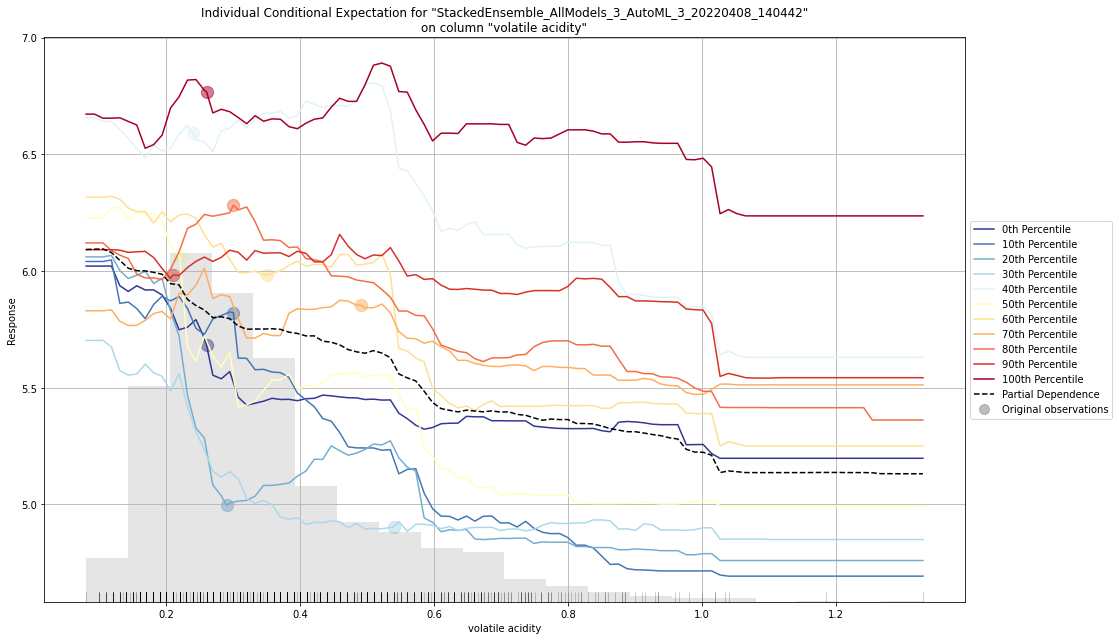

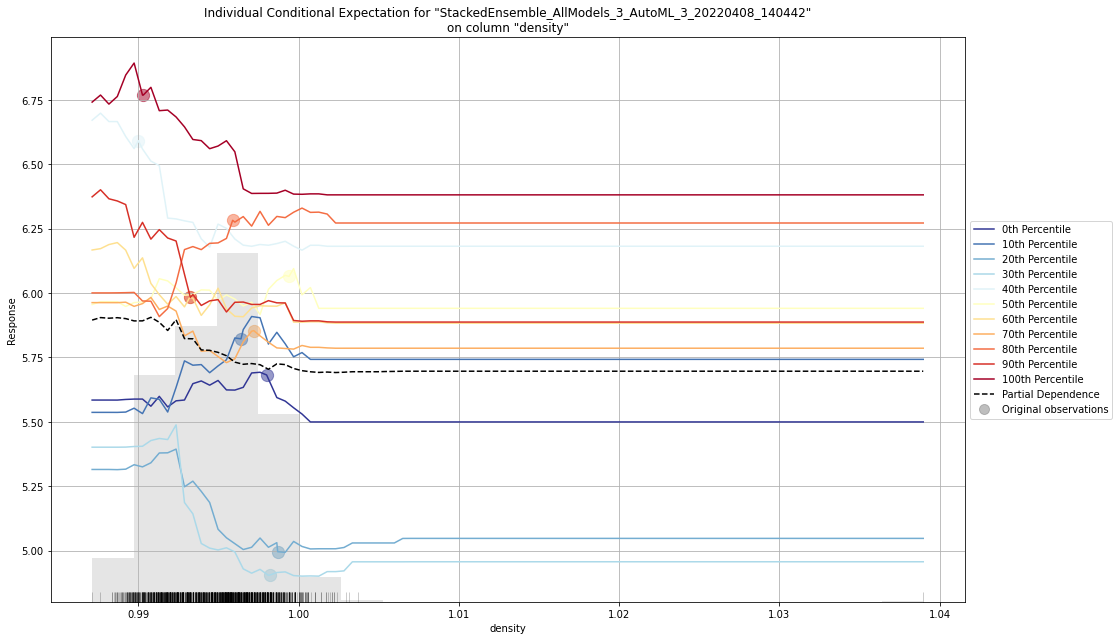

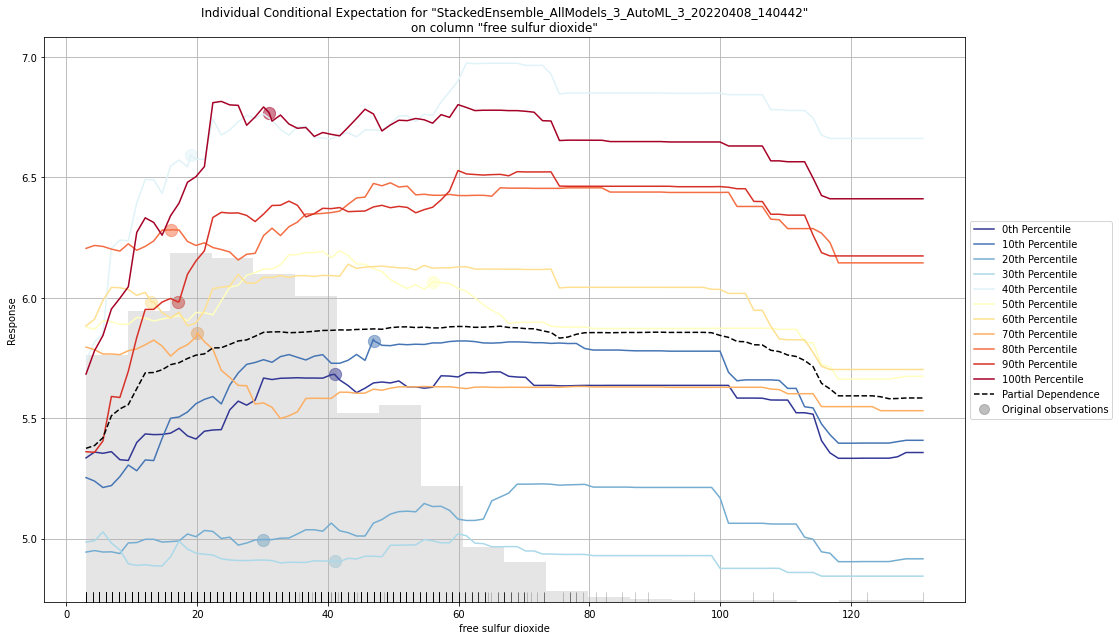

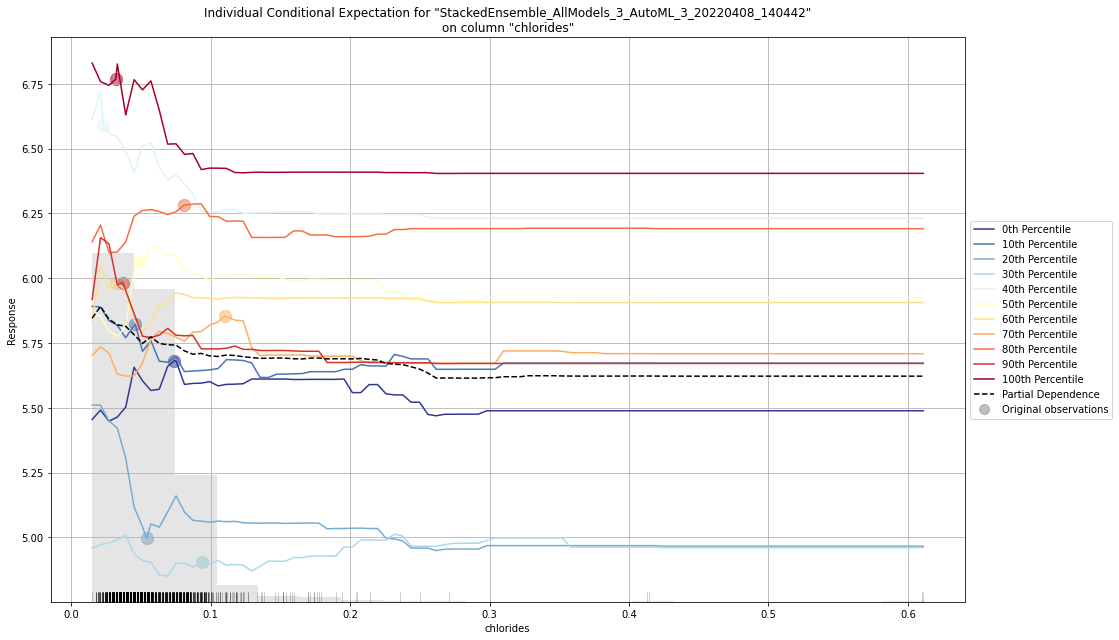

In [5]:
aml.explain(test);

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_AllModels_3_AutoML_3_20220408_140442,0.613158,0.375963,0.428688,0.0929837,0.375963,1334,0.072912,StackedEnsemble,5.27411
StackedEnsemble_BestOfFamily_4_AutoML_3_20220408_140442,0.615253,0.378536,0.431953,0.093312,0.378536,423,0.027955,StackedEnsemble,5.29165
StackedEnsemble_AllModels_2_AutoML_3_20220408_140442,0.61886,0.382988,0.439722,0.0937725,0.382988,146,0.033774,StackedEnsemble,5.36343
StackedEnsemble_AllModels_1_AutoML_3_20220408_140442,0.619165,0.383365,0.440646,0.0937997,0.383365,146,0.02613,StackedEnsemble,5.3616
StackedEnsemble_BestOfFamily_3_AutoML_3_20220408_140442,0.619706,0.384036,0.441241,0.0938909,0.384036,148,0.025569,StackedEnsemble,5.36032
StackedEnsemble_BestOfFamily_2_AutoML_3_20220408_140442,0.620427,0.38493,0.442876,0.0939805,0.38493,138,0.023944,StackedEnsemble,5.35617
DRF_1_AutoML_3_20220408_140442,0.622971,0.388092,0.449611,0.094527,0.388092,607,0.012088,DRF,5.37536
GBM_grid_1_AutoML_3_20220408_140442_model_8,0.624575,0.390094,0.422475,0.0949575,0.390094,1812,0.013222,GBM,5.26905
XRT_1_AutoML_3_20220408_140442,0.626012,0.391891,0.452358,0.0950673,0.391891,836,0.012583,DRF,5.50439
GBM_grid_1_AutoML_3_20220408_140442_model_5,0.641773,0.411872,0.469973,0.0970923,0.411872,941,0.015306,GBM,5.45243


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

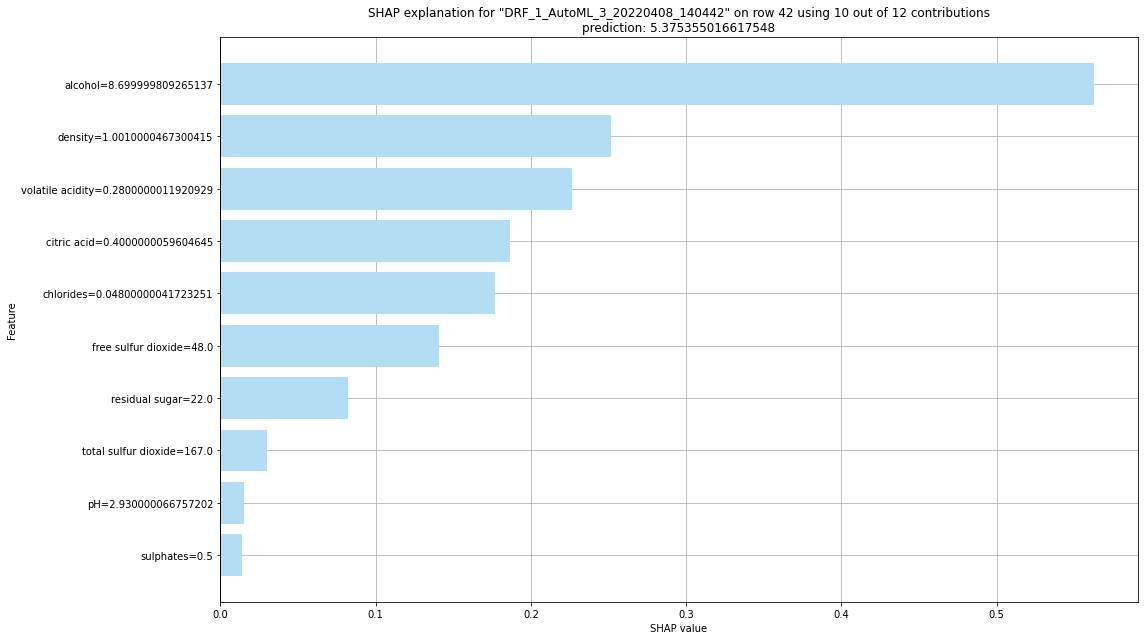

In [6]:
aml.explain_row(test, row_index=42);